In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Aplicando Análise de Correspondência Múltipla com Análise Fatorial por Componentes Principais

Exemplo da aula do MBA DSA USP/ESALQ com Prof. Wilson Tarantin Jr.

Prof. Wilson Tarantin Jr.

Fonte: https://www.kaggle.com/datasets/elakiricoder/jiffs-house-price-prediction-dataset

- Referência PCA: https://www.datacamp.com/tutorial/introduction-factor-analysis
- Documentação PCA: https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html


- Referência_MCA: https://www.kaggle.com/code/jiagengchang/heart-disease-multiple-correspondence-analysis/notebook

- Documentação_MCA: https://pypi.org/project/prince/#correspondence-analysis-ca


### Aplicabilidade

Transformar, atavés da Análise de Correspondência, variáveis qualitativas em variáveis qualitativas para incluí-las na análise Fatorial por Componentes Principais.


### Objetivo da Análise

Criar um ranking que leve em consideração as características qualitativas e quantitativas das casas.


In [2]:
#Importando base
casas = pd.read_excel(r'bases\Preco Casas.xlsx')

In [3]:
casas

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size_class,property_value
0,201,177,3,1,No,Yes,Yes,No,3.3,Yes,10,No,6.8,0.90,Zero,165432
1,196,182,4,3,Yes,Yes,No,Yes,1.2,Yes,11,No,4.1,1.42,One,187043
2,198,182,4,4,Yes,Yes,No,Yes,5.9,No,20,No,2.1,4.12,One,148658
3,178,166,2,3,No,Yes,No,No,5.9,No,5,No,0.7,4.36,Zero,123785
4,183,165,3,1,Yes,Yes,No,No,3.8,Yes,8,No,0.7,0.42,Zero,156470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,297,261,4,4,Yes,Yes,Yes,Yes,2.9,Yes,20,No,4.1,3.99,Two,235882
4950,302,282,4,2,Yes,Yes,Yes,Yes,3.8,Yes,12,Yes,4.8,2.09,Two,290995
4951,153,147,3,4,Yes,Yes,No,No,3.3,Yes,7,No,4.7,3.98,Three,106428
4952,180,158,2,1,No,Yes,No,Yes,2.2,No,1,No,3.4,3.75,Two,107579


In [4]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   large_living_room           4954 non-null   object 
 5   parking_space               4954 non-null   object 
 6   front_garden                4954 non-null   object 
 7   swimming_pool               4954 non-null   object 
 8   distance_to_school          4954 non-null   float64
 9   wall_fence                  4954 non-null   object 
 10  house_age                   4954 non-null   int64  
 11  water_front                 4954 non-null   object 
 12  distance_to_supermarket_km  4954 non-null   float64
 13  crime_rate_index            4954 

### Separando Variáveis Qualitativas das Quantitativas

In [5]:
var_quali = casas[['large_living_room', 
                   'parking_space', 
                   'front_garden', 
                   'swimming_pool', 
                   'wall_fence', 
                   'water_front', 
                   'room_size_class']]

var_quanti = casas[['land_size_sqm', 
                   'house_size_sqm', 
                   'no_of_rooms', 
                   'no_of_bathrooms', 
                   'distance_to_school', 
                   'house_age', 
                   'distance_to_supermarket_km', 
                    'crime_rate_index']]

In [6]:
var_quali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   large_living_room  4954 non-null   object
 1   parking_space      4954 non-null   object
 2   front_garden       4954 non-null   object
 3   swimming_pool      4954 non-null   object
 4   wall_fence         4954 non-null   object
 5   water_front        4954 non-null   object
 6   room_size_class    4954 non-null   object
dtypes: object(7)
memory usage: 271.0+ KB


In [7]:
var_quanti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   distance_to_school          4954 non-null   float64
 5   house_age                   4954 non-null   int64  
 6   distance_to_supermarket_km  4954 non-null   float64
 7   crime_rate_index            4954 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 309.8 KB


In [8]:
var_quali.describe()

,large_living_room,parking_space,front_garden,swimming_pool,wall_fence,water_front,room_size_class
count,4954,4954,4954,4954,4954,4954,4954
unique,2,2,2,2,2,2,4
top,Yes,Yes,Yes,Yes,Yes,No,Two
freq,3586,3784,3109,3060,3123,4713,1779


In [9]:
var_quanti.describe()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,250.131409,231.250908,3.788252,3.199839,3.454219,11.444691,3.508639,2.986110
std,103.131939,94.571642,1.585371,1.602300,2.007358,6.356991,1.991266,1.737742
min,100.000000,85.000000,1.000000,1.000000,0.100000,1.000000,0.100000,0.010000
25%,180.000000,165.000000,3.000000,2.000000,1.700000,6.000000,1.800000,1.470000
50%,235.000000,217.500000,4.000000,3.000000,3.400000,11.000000,3.500000,3.020000
75%,295.000000,274.000000,5.000000,4.000000,5.200000,17.000000,5.300000,4.490000
max,796.000000,760.000000,8.000000,9.000000,6.900000,22.000000,6.900000,5.990000


# Aplicando Análise de Correspondência Múltipla

# Análise da Significância Estatística Para Análise de Correspondência Múltipla

Teste de associação qui-quadrado para avaliar a significância para pares de variáveis.

**Deve-se aplicar o teste qui-quadrado para cada combinação de pares das variáveis.**


Soma das estatísticas qui2 individuais para cada par de variável. <br>
A partir da estatística qui2 total testaremos as hipóteses:

> H0: não existe associação entre as variáveis <br>
> H1: existe associação entre as variáveis

p-valor < 0,05 rejeita H0.

C (estatística qui2) <br>
p (p-valor) <br>
dof (graus de liberdade)<br>
expected (tabela com valores esperados)<br>


**Caso alguma variável não tenha associação estatisticamente significativa com pelo menos uma outra, essa variável deve ser retirada da análise.**

In [10]:
from scipy.stats import chi2_contingency

#Criando tabela de contingência
for column in var_quali.columns:
    
    tabela_contingencia = pd.crosstab(var_quali['large_living_room'],
                                     var_quali[column])
    
    # Calculando QUI2

    c, p, dof, expected = chi2_contingency(tabela_contingencia)

    print(f'large_living_room X {column}: qui2= {c:.3f}, df= {dof}, p-value= {p:.3f}')

large_living_room X large_living_room: qui2= 4948.998, df= 1, p-value= 0.000
large_living_room X parking_space: qui2= 345.456, df= 1, p-value= 0.000
large_living_room X front_garden: qui2= 535.416, df= 1, p-value= 0.000
large_living_room X swimming_pool: qui2= 478.450, df= 1, p-value= 0.000
large_living_room X wall_fence: qui2= 359.215, df= 1, p-value= 0.000
large_living_room X water_front: qui2= 8.772, df= 1, p-value= 0.003
large_living_room X room_size_class: qui2= 141.698, df= 3, p-value= 0.000


**Todas apresentam associação com pelo menos uma outra variável.**

## Análise de Correspondência Múltipla

Prince utiliza a Matriz de Burt para gerar as Coordenadas

In [11]:
import prince

#Calculondo qtde de autovalores:
mca = prince.MCA(n_components=2, engine='auto')
#Treino do modelo
mca = mca.fit(var_quali)

In [12]:
#Autovalores
mca.eigenvalues_

[0.353575510292585, 0.1460052787789105]

In [13]:
#Variância explicada
mca.explained_inertia_

[0.2750031746720105, 0.11355966127248594]

In [14]:
#Coordenadas
mca_coord = mca.column_coordinates(var_quali)
mca_coord

,0,1
large_living_room_No,0.976380,-0.095572
large_living_room_Yes,-0.372473,0.036459
parking_space_No,1.205710,0.064914
parking_space_Yes,-0.372802,-0.020071
front_garden_No,0.909825,-0.019481
front_garden_Yes,-0.539925,0.011561
swimming_pool_No,0.886997,0.058291
swimming_pool_Yes,-0.549011,-0.036080
wall_fence_No,0.868065,0.036232
wall_fence_Yes,-0.508942,-0.021243


## Mapa Perceptual

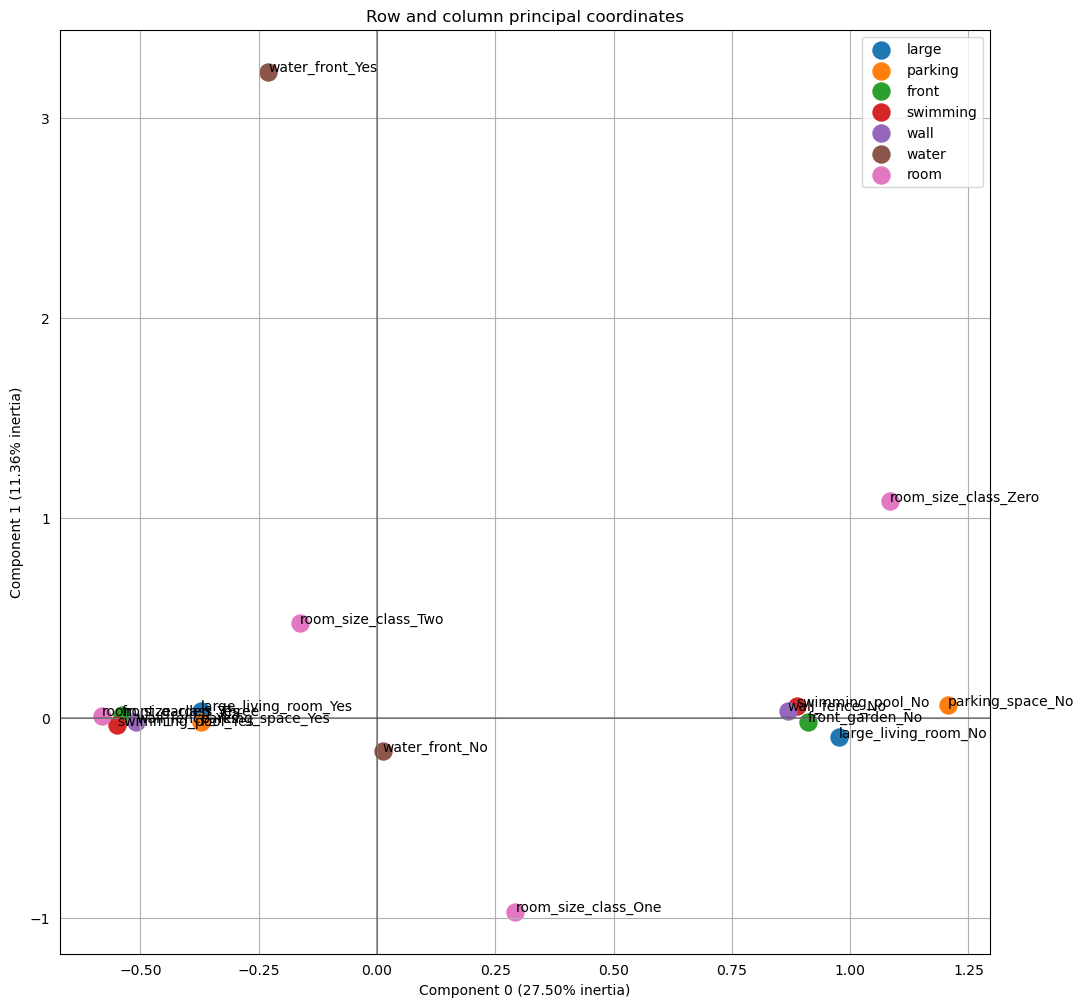

In [15]:
#Plota o mapa Perceptual
mp_mca = mca.plot_coordinates(var_quali,
                         ax=None,
                          figsize=(12,12),
                         show_row_points=False,
                         show_column_labels=True,
                         column_points_size = 150,
                             legend_n_cols=1)

#### Transformamos as Variáveis Qualitativas em Variáveis Quantitativas para aplicá-las na PCA

In [16]:
mca_obs_coord = mca.row_coordinates(var_quali)
mca_obs_coord.columns = ['X', 'Y']
mca_obs_coord

,X,Y
0,0.369421,0.317828
1,-0.141592,-0.447006
2,0.189233,-0.425518
3,1.048545,0.327711
4,0.393661,0.355585
...,...,...
4949,-0.599403,0.104366
4950,-0.657489,1.374289
4951,-0.006458,-0.044800
4952,0.403782,0.064887


In [17]:
#Incluindo as coordenadas das observaçoes na base var_quanti
var_quanti = var_quanti.assign(X = mca_obs_coord['X'])
var_quanti = var_quanti.assign(Y = mca_obs_coord['Y'])
var_quanti

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,X,Y
0,201,177,3,1,3.3,10,6.8,0.90,0.369421,0.317828
1,196,182,4,3,1.2,11,4.1,1.42,-0.141592,-0.447006
2,198,182,4,4,5.9,20,2.1,4.12,0.189233,-0.425518
3,178,166,2,3,5.9,5,0.7,4.36,1.048545,0.327711
4,183,165,3,1,3.8,8,0.7,0.42,0.393661,0.355585
...,...,...,...,...,...,...,...,...,...,...
4949,297,261,4,4,2.9,20,4.1,3.99,-0.599403,0.104366
4950,302,282,4,2,3.8,12,4.8,2.09,-0.657489,1.374289
4951,153,147,3,4,3.3,7,4.7,3.98,-0.006458,-0.044800
4952,180,158,2,1,2.2,1,3.4,3.75,0.403782,0.064887


# Aplicando Análise Fatorial PCA

In [18]:
#Verifica correlação

matriz_corr = var_quanti.corr()
matriz_corr

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,X,Y
land_size_sqm,1.000000,0.991371,0.898252,0.679780,-0.011094,0.006547,0.004692,0.007752,-6.663421e-01,3.344330e-02
house_size_sqm,0.991371,1.000000,0.894753,0.677722,-0.010658,0.008198,0.001966,0.008044,-6.604585e-01,3.503460e-02
no_of_rooms,0.898252,0.894753,1.000000,0.710043,-0.006162,0.003455,-0.007287,0.014644,-8.061906e-01,1.145399e-02
no_of_bathrooms,0.679780,0.677722,0.710043,1.000000,-0.008322,0.000966,-0.002535,0.010655,-5.554102e-01,1.721054e-02
distance_to_school,-0.011094,-0.010658,-0.006162,-0.008322,1.000000,0.011519,0.010095,-0.002084,2.583526e-03,-3.757820e-03
house_age,0.006547,0.008198,0.003455,0.000966,0.011519,1.000000,-0.002793,-0.000667,-3.263494e-03,3.138791e-03
distance_to_supermarket_km,0.004692,0.001966,-0.007287,-0.002535,0.010095,-0.002793,1.000000,0.018026,1.188093e-02,8.437543e-03
crime_rate_index,0.007752,0.008044,0.014644,0.010655,-0.002084,-0.000667,0.018026,1.000000,-4.605052e-03,-2.387874e-02
X,-0.666342,-0.660458,-0.806191,-0.555410,0.002584,-0.003263,0.011881,-0.004605,1.000000e+00,4.304533e-15
Y,0.033443,0.035035,0.011454,0.017211,-0.003758,0.003139,0.008438,-0.023879,4.304533e-15,1.000000e+00


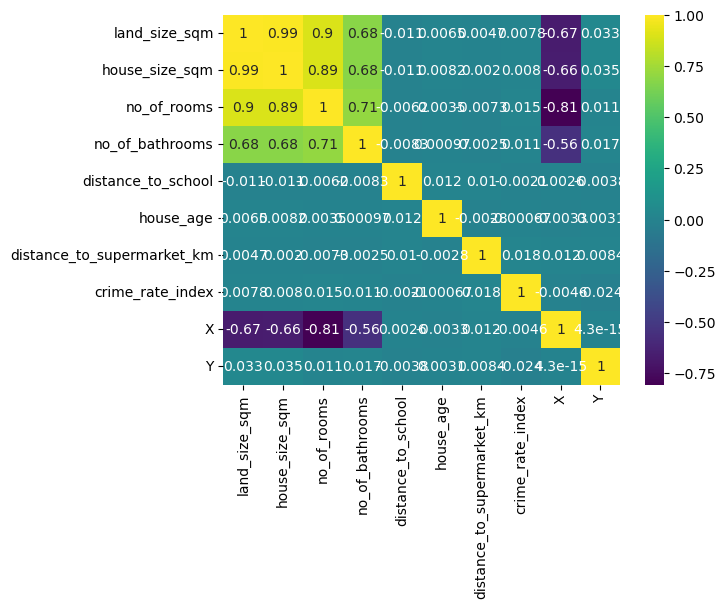

In [19]:
#Gráfico matriz correlação

sns.heatmap(matriz_corr, cmap='viridis', annot=True)
plt.show()

# A correlação do eixo X é muito alta com o tamanho da casa pq olhando para o mapa perceptual, 
# vemos que as maiores casas estão no lado negativo do eixo X

### Matriz de Significância

Matriz com p-valores do coeficiente de correlação. <br> 
Avaliar a significância individual de cada coeficiente de correlação dos pares de variáveis.

**p-valor < 0,05 indica que o coeficiente de correlação é estatisticamente relevante**

Todas as variáveis possuem coeficientes de correlação significantes.

In [20]:
from matrixSig import matrixSig

matrixsig = matrixSig(matriz_corr, var_quanti)
matrixsig.round(2)

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,X,Y
land_size_sqm,NA,0.0,0.0,0.0,0.43501,0.64502,0.7413,0.5854,0.0,0.01857
house_size_sqm,0.0,NA,0.0,0.0,0.45327,0.56404,0.88998,0.57138,0.0,0.01366
no_of_rooms,0.0,0.0,NA,0.0,0.66459,0.8079,0.60812,0.30278,0.0,0.42024
no_of_bathrooms,0.0,0.0,0.0,NA,0.55814,0.94578,0.85845,0.4534,0.0,0.22584
distance_to_school,0.43501,0.45327,0.66459,0.55814,NA,0.4176,0.47746,0.88341,0.85574,0.79145
house_age,0.64502,0.56404,0.8079,0.94578,0.4176,NA,0.84417,0.96254,0.81837,0.8252
distance_to_supermarket_km,0.7413,0.88998,0.60812,0.85845,0.47746,0.84417,NA,0.20461,0.40312,0.55269
crime_rate_index,0.5854,0.57138,0.30278,0.4534,0.88341,0.96254,0.20461,NA,0.7459,0.09286
X,0.0,0.0,0.0,0.0,0.85574,0.81837,0.40312,0.7459,NA,1.0
Y,0.01857,0.01366,0.42024,0.22584,0.79145,0.8252,0.55269,0.09286,1.0,NA


### Teste de Esfericidade de Barlett

Avalia se a aplicação da análise fatorial é adequada ou não.<br>
O teste verifica se os coeficientes de correlação são estatisticamente diferentes de zero.

p-valor < 0,05: rejeita H0

>H0: A Matriz de Correlação é igual à Matriz Identidade.

>H1: A Matriz de Correlação não é igual à Matriz Identidade.


Não queremos que as correlações sejam iguais a zero, pois assim não existiria nenhuma correlação entre as variáveis e consequentemente não seria possível criar fatores.

In [21]:
#https://www.datacamp.com/tutorial/introduction-factor-analysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Calcula p-valor para avaliar se rejeita H0
chi_square_value, p_value=calculate_bartlett_sphericity(var_quanti)
print()

print(f'ChiSq: {chi_square_value:.4f}, p-value: {p_value:.4f}')


ChiSq: 37339.1233, p-value: 0.0000


### Elaboração da Análise Fatorial por Componentes Principais

In [22]:
#https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#module-factor_analyzer.factor_analyzer
from factor_analyzer import FactorAnalyzer

# Aplicando o metodo fatorial utilziando todas as variáveis da base
fa = FactorAnalyzer(rotation=None, n_factors=len(var_quanti.columns), method='principal')
fa.fit(var_quanti)

FactorAnalyzer(method='principal', n_factors=10, rotation=None,
               rotation_kwargs={})

### Eigenvalues ( Autovalores)

O primeiro Autovalor é sempre o maior valor e que gera o fator principal.


Os Autovalores apresentam a proporção da variância que foi compartilhada pelas variáveis originais na formação daquele fator.

40,4% da variância das variáveis originais já estão representadas no primeiro fator. <br>
10,3% da variância das variáveis originais estão representadas no segundo fator. <br>
10,1% da variância das variáveis originais estão representadas no terceiro fator. <br>
10,1% da variância das variáveis originais estão representadas no quarto fator. <br>
As 4 representam 70,9% da variância das variáveis originais.

In [25]:
tabela_eigen = pd.DataFrame(fa.get_factor_variance())
tabela_eigen.columns = [f'Fator {1+i}' for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor', 'Variância', 'Variância Acumulada']
tabela_eigen.round(3)

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
Autovalor,4.041,1.027,1.015,1.007,0.989,0.963,0.457,0.411,0.081,0.009
Variância,0.404,0.103,0.101,0.101,0.099,0.096,0.046,0.041,0.008,0.001
Variância Acumulada,0.404,0.507,0.608,0.709,0.808,0.904,0.950,0.991,0.999,1.000


# Critério de Kaiser

Seleciona os fatores derivados de autovalores maiores que 1, ou seja, fatores que têm percentual maior de variância das variáveis originais.

Esse critério tem como base o raciocínio de que autovalores representam a quantidade de variação explicada por um fator e que um autovalor de 1 representa uma quantidade substancial de variação. (https://repositorio.enap.gov.br/bitstream/1/4790/1/Livro%20An%C3%A1lise%20Fatorial.pdf)

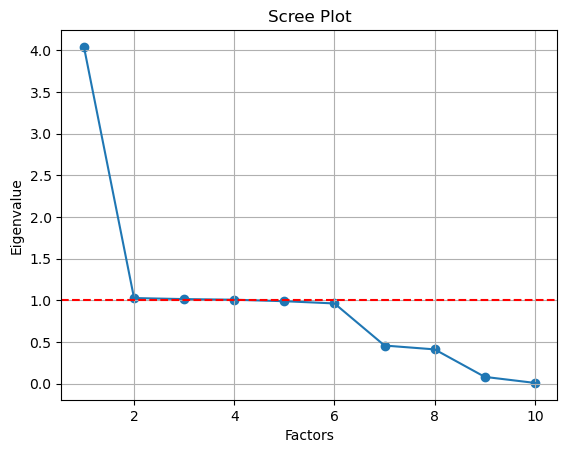

In [26]:
#eigen values

ev, v = fa.get_eigenvalues()

#https://www.kaggle.com/code/caesarlupum/factor-analysis-segmentation-analysis/notebook
plt.scatter(range(1,var_quanti.shape[1]+1),ev)
plt.plot(range(1,var_quanti.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

In [27]:
#Contando fatores que possuem eigenvalues > 1
k = len(list(filter(lambda x: x>1, ev )))

#Aplica Factor Analysis usando critério de Kaiser

fa2 = FactorAnalyzer(n_factors=k, method='principal', rotation=None)
fa2.fit(var_quanti)

FactorAnalyzer(method='principal', n_factors=4, rotation=None,
               rotation_kwargs={})

### Fatores

Valor preditos das observações dentro dos fatores.

Esses fatores apresentam correlação zero entre eles. Não são correlacionados.

In [28]:
fatores_preditos = pd.DataFrame(fa2.transform(var_quanti))
fatores_preditos.columns = [f'Fator {1+i}' for i, v in enumerate(fatores_preditos.columns)]
fatores_preditos.head(100).round(3)

,Fator 1,Fator 2,Fator 3,Fator 4
0,-0.762,-0.768,1.012,1.450
1,-0.199,-0.011,-0.958,-0.071
2,-0.182,0.919,0.639,-2.022
3,-0.972,-0.205,-0.148,-0.165
4,-0.840,-2.026,-0.477,-0.286
...,...,...,...,...
95,0.088,-0.272,-1.011,-0.107
96,-0.287,0.532,-0.943,-1.625
97,0.346,-0.487,0.237,0.674
98,-0.943,-1.351,-0.468,-0.217


### Scores/ Weights

- Fator 1 possui maior peso nas variáveis land_size_sqm, house_size_sqm, no_of_rooms, e X.
- Fator 2 possui maior peso nas variáveis crime_rate_index e Y.
- Fator 3 possui maior peso em distance_to_school, house_age, distance_to_supermarket_km
- Fator 4 possui maior peso em house_age

In [29]:
tabela_scores = pd.DataFrame(fa2.weights_)
tabela_scores.columns = [f'Fator {1+i}' for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = var_quanti.columns
tabela_scores.round(3)

,Fator 1,Fator 2,Fator 3,Fator 4
land_size_sqm,0.236,-0.007,0.010,0.013
house_size_sqm,0.235,-0.009,0.011,0.011
no_of_rooms,0.238,0.011,-0.007,-0.012
no_of_bathrooms,0.198,0.005,-0.005,0.002
distance_to_school,-0.003,0.123,0.628,-0.317
house_age,0.002,-0.067,0.474,-0.546
distance_to_supermarket_km,-0.001,0.345,0.502,0.604
crime_rate_index,0.003,0.720,-0.042,0.082
X,-0.202,-0.012,0.016,0.031
Y,0.007,-0.562,0.335,0.470


### Cargas Fatoriais

Representam a correlação de pearson entre o fator e a variável original.<br>
Conseguimos identificar quais os componentes relevantes dentro de cada fator.

Mesma análise do Scores/Weights

In [30]:
tabela_cargas = pd.DataFrame(fa2.loadings_)
tabela_cargas.columns = [f'Fator {1+i}' for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = var_quanti.columns
tabela_cargas.round(3)

,Fator 1,Fator 2,Fator 3,Fator 4
land_size_sqm,0.952,-0.007,0.010,0.013
house_size_sqm,0.949,-0.009,0.011,0.011
no_of_rooms,0.964,0.011,-0.007,-0.012
no_of_bathrooms,0.799,0.006,-0.005,0.002
distance_to_school,-0.012,0.126,0.637,-0.319
house_age,0.007,-0.069,0.481,-0.550
distance_to_supermarket_km,-0.004,0.355,0.510,0.608
crime_rate_index,0.013,0.740,-0.043,0.082
X,-0.816,-0.013,0.016,0.032
Y,0.029,-0.577,0.340,0.473


### Comunalidades

Verificar se houve muita perda de variância utilizando apenas 2 fatores <br>

- Poucas perdas da variância nas variáveis de forma geral.

In [31]:
comunalidade = pd.DataFrame(fa2.get_communalities())
comunalidade.columns = ['Comunalidade']
comunalidade.index = var_quanti.columns
comunalidade.round(3)

,Comunalidade
land_size_sqm,0.906
house_size_sqm,0.902
no_of_rooms,0.929
no_of_bathrooms,0.638
distance_to_school,0.524
house_age,0.539
distance_to_supermarket_km,0.755
crime_rate_index,0.556
X,0.667
Y,0.673


## Loading Plot

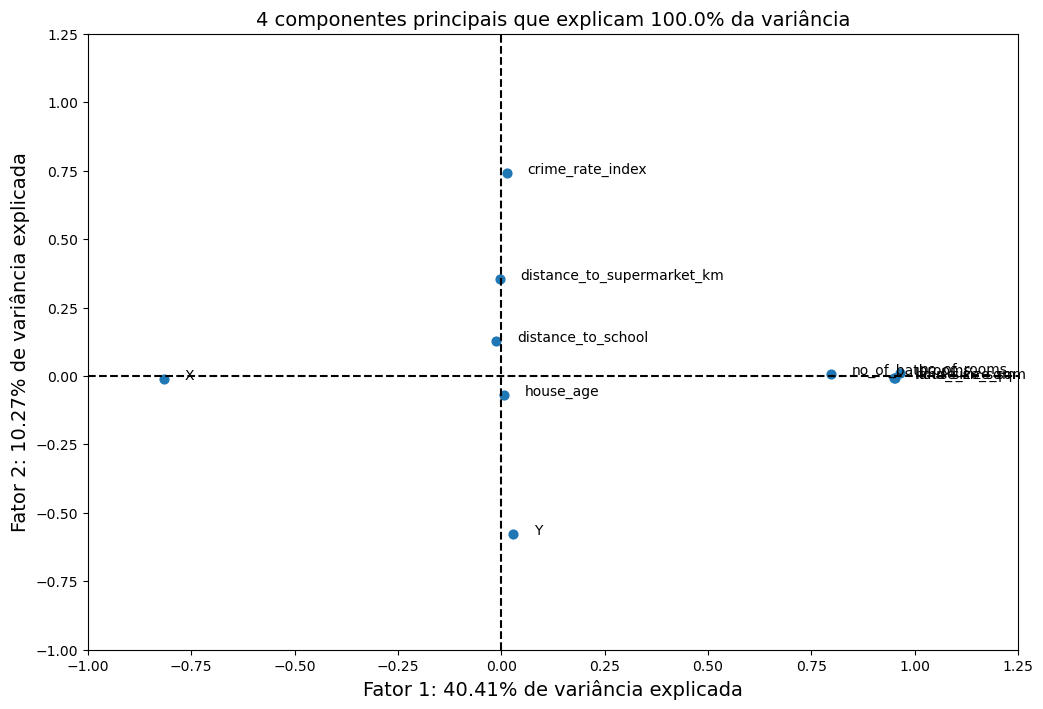

In [32]:
# Gráfico das cargas fatoriais e suas variâncias nos componentes principais
plt.figure(figsize=(12,8))

tabela_cargas_chart = tabela_cargas.reset_index()

plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=40)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='black', ls='--')
plt.axvline(x=0, color='black', ls='--')
plt.ylim([-1.0,1.25])
plt.xlim([-1.0,1.25])
plt.title(f"{len(tabela_cargas.columns)} componentes principais que explicam {round(tabela_eigen.T['Variância'].sum()*100,2)}% da variância", fontsize=14)
plt.xlabel(f"Fator 1: {round(tabela_eigen.T.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.ylabel(f"Fator 2: {round(tabela_eigen.T.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.show()

## Criando Ranking com Fatores

Ranking baseado no Fator 1 a Fator 4 ponderando pela variância compartilhada entre os dois fatores.

ou seja,

(Fator 1 * 0,404) + (Fator 2 * 0,103) + (Fator 3 * 0,101) + (Fator 4 * 0,101)

In [33]:
# Criando um ranking
casas['Ranking'] = 0

for index, fator in enumerate(list(tabela_cargas.T.index)):
    variancia = tabela_eigen.T.loc[fator]['Variância']

    casas['Ranking'] = casas['Ranking'] + fatores_preditos[fatores_preditos.T.index[index]]*variancia

    
casas = casas.sort_values(by=['Ranking'], ascending=False)
casas.head(10)

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size_class,property_value,Ranking
1272,773,760,8,9,Yes,Yes,Yes,Yes,3.5,Yes,16,No,6.5,4.08,Three,576789,1.922638
3274,783,737,8,6,Yes,Yes,Yes,Yes,0.7,Yes,17,Yes,6.4,5.91,Two,684338,1.866962
1700,788,737,8,7,Yes,Yes,Yes,Yes,4.2,Yes,12,No,6.8,3.70,Two,609407,1.840219
121,707,706,8,8,Yes,Yes,Yes,Yes,4.6,Yes,8,Yes,4.2,5.98,Three,633937,1.808828
2165,727,642,8,9,Yes,Yes,Yes,Yes,6.7,Yes,15,No,4.1,5.64,Three,549116,1.724501
2733,796,692,8,9,Yes,Yes,Yes,Yes,0.3,Yes,16,No,5.3,3.40,Three,609388,1.686550
3245,767,678,8,9,Yes,Yes,Yes,Yes,5.8,Yes,12,Yes,4.6,0.06,Three,692086,1.663726
2730,781,727,8,9,Yes,Yes,Yes,Yes,4.2,Yes,5,No,4.1,1.13,Two,631783,1.621619
2640,622,584,8,9,Yes,Yes,Yes,Yes,5.3,Yes,16,No,5.4,5.31,Two,471351,1.614313
1662,598,560,7,8,Yes,Yes,Yes,Yes,1.9,Yes,2,Yes,6.5,5.14,Three,543050,1.583078


## O Ranking Captura o Valor das Casas?

Sim, existe uma alta correlação entre o ranking e os valores das casas com significância estatística.

In [34]:
# Calculando a correlação do valor das casas com o ranking
valor_corr_coef = casas.iloc[:,14:].corr()
valor_corr_coef

,property_value,Ranking
property_value,1.000000,0.855583
Ranking,0.855583,1.000000


In [35]:
# Calculando a significância dos coeficientes de correlação
matrixSig(valor_corr_coef, casas.iloc[:,14:])

,property_value,Ranking
property_value,NA,0.0
Ranking,0.0,NA
